In [18]:
#pip install seaborn
#pip install --upgrade scikit-learn

In [19]:
#import sys
#sys.path

In [20]:
#sys.executable

In [1]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from time import time

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

import xgboost as xgb

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, f1_score, recall_score, classification_report
#from sklearn.metrics import plot_confusion_matrix

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report , roc_curve, auc

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [129]:
df = pd.read_csv("winequality-red.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [130]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [131]:
#EDA
df.shape

(1599, 12)

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [134]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [135]:
cols_name = list(df.columns)
cols_name

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [136]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [137]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [138]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [139]:
means = pd.pivot_table(data=df, index='quality',aggfunc={'fixed acidity':np.mean, 
                                                         'volatile acidity':np.mean, 
                                                         'citric acid':np.mean, 
                                                         'residual sugar':np.mean,
                                                         'chlorides':np.mean,
                                                         'free sulfur dioxide':np.mean,
                                                         'density':np.mean,
                                                         'pH':np.mean,
                                                         'sulphates':np.mean,
                                                         'alcohol':np.mean
                                                        }
                      )
means

,alcohol,chlorides,citric acid,density,fixed acidity,free sulfur dioxide,pH,residual sugar,sulphates,volatile acidity
quality,,,,,,,,,,
3,9.955000,0.122500,0.171000,0.997464,8.360000,11.000000,3.398000,2.635000,0.570000,0.884500
4,10.265094,0.090679,0.174151,0.996542,7.779245,12.264151,3.381509,2.694340,0.596415,0.693962
5,9.899706,0.092736,0.243686,0.997104,8.167254,16.983847,3.304949,2.528855,0.620969,0.577041
6,10.629519,0.084956,0.273824,0.996615,8.347179,15.711599,3.318072,2.477194,0.675329,0.497484
7,11.465913,0.076588,0.375176,0.996104,8.872362,14.045226,3.290754,2.720603,0.741256,0.403920
8,12.094444,0.068444,0.391111,0.995212,8.566667,13.277778,3.267222,2.577778,0.767778,0.423333


In [141]:
df['class'] =[1 if x >= 7 else 0 for x in df['quality']]

In [143]:
df['class'].value_counts()

class
0    1382
1     217
Name: count, dtype: int64

In [145]:
df1=df.drop(columns='quality')

In [146]:
means = pd.pivot_table(data=df, index='class',aggfunc={'fixed acidity':np.mean,
                                                       'volatile acidity':np.mean,
                                                       'citric acid':np.mean,
                                                       'residual sugar':np.mean,
                                                       'chlorides':np.mean,
                                                       'free sulfur dioxide':np.mean,
                                                       'density':np.mean,
                                                       'pH':np.mean,
                                                       'sulphates':np.mean,
                                                       'alcohol':np.mean}
                      )
means

,alcohol,chlorides,citric acid,density,fixed acidity,free sulfur dioxide,pH,residual sugar,sulphates,volatile acidity
class,,,,,,,,,,
0,10.251037,0.089281,0.254407,0.996859,8.236831,16.172214,3.314616,2.512120,0.644754,0.547022
1,11.518049,0.075912,0.376498,0.996030,8.847005,13.981567,3.288802,2.708756,0.743456,0.405530


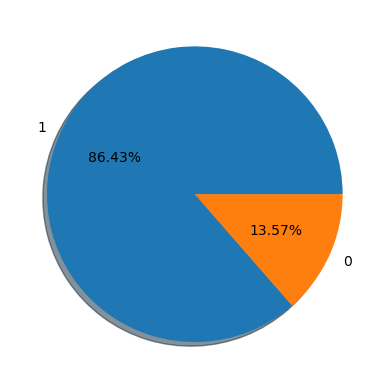

In [147]:
labels = '1','0',
fig, ax = plt.subplots()
ax.pie(df['class'].value_counts(),labels = labels,radius =1,autopct = '%1.2f%%', shadow=True,)
plt.show()

<Axes: >

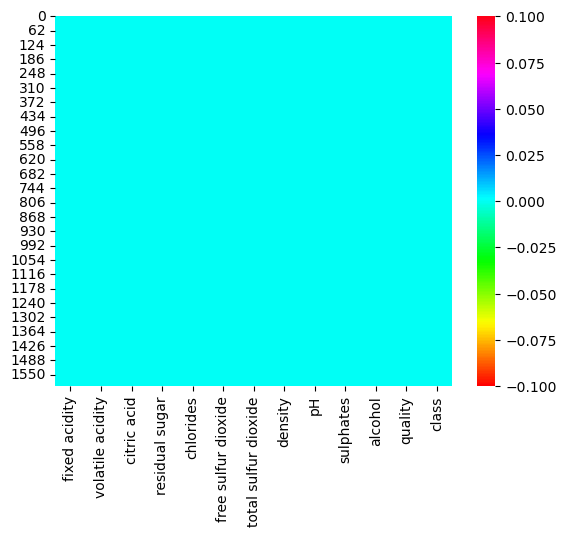

In [148]:
sns.heatmap(df.isnull(), cmap='hsv')

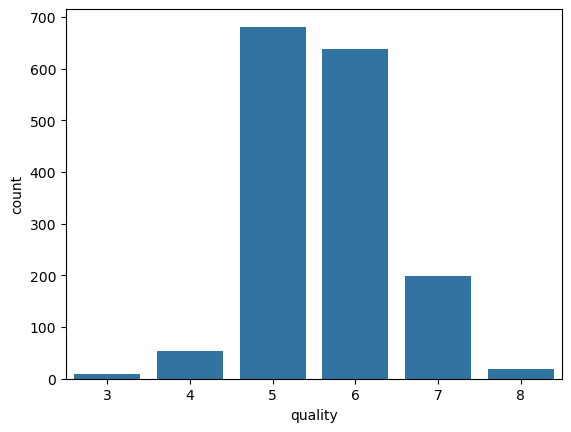

In [149]:
#checking the quality , our target variable
sns.countplot(df,x="quality")
plt.show()

In [150]:
df['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

<Figure size 300x300 with 0 Axes>

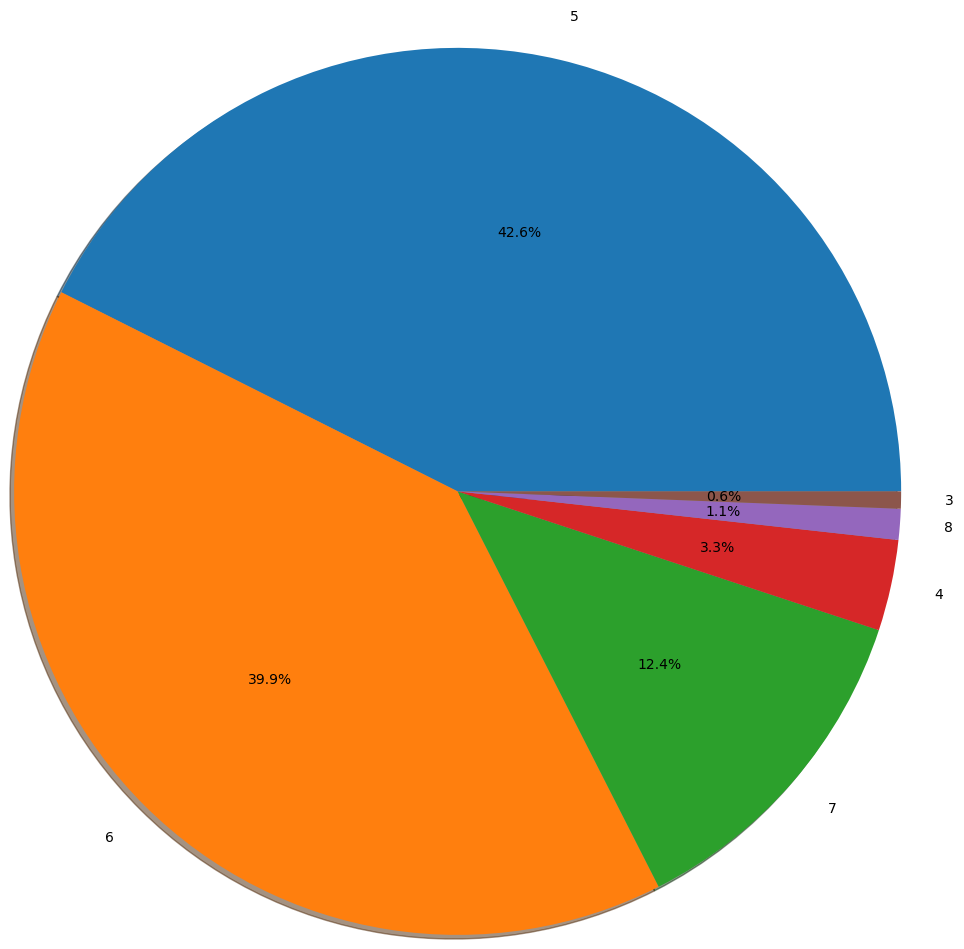

In [151]:
plt.figure(figsize=(3,3))
labels = '5','6','7','4','8','3'
fig, ax = plt.subplots()
ax.pie(df['quality'].value_counts(),labels = labels,radius =3 ,autopct = '%1.1f%%', shadow=True,)
plt.show()

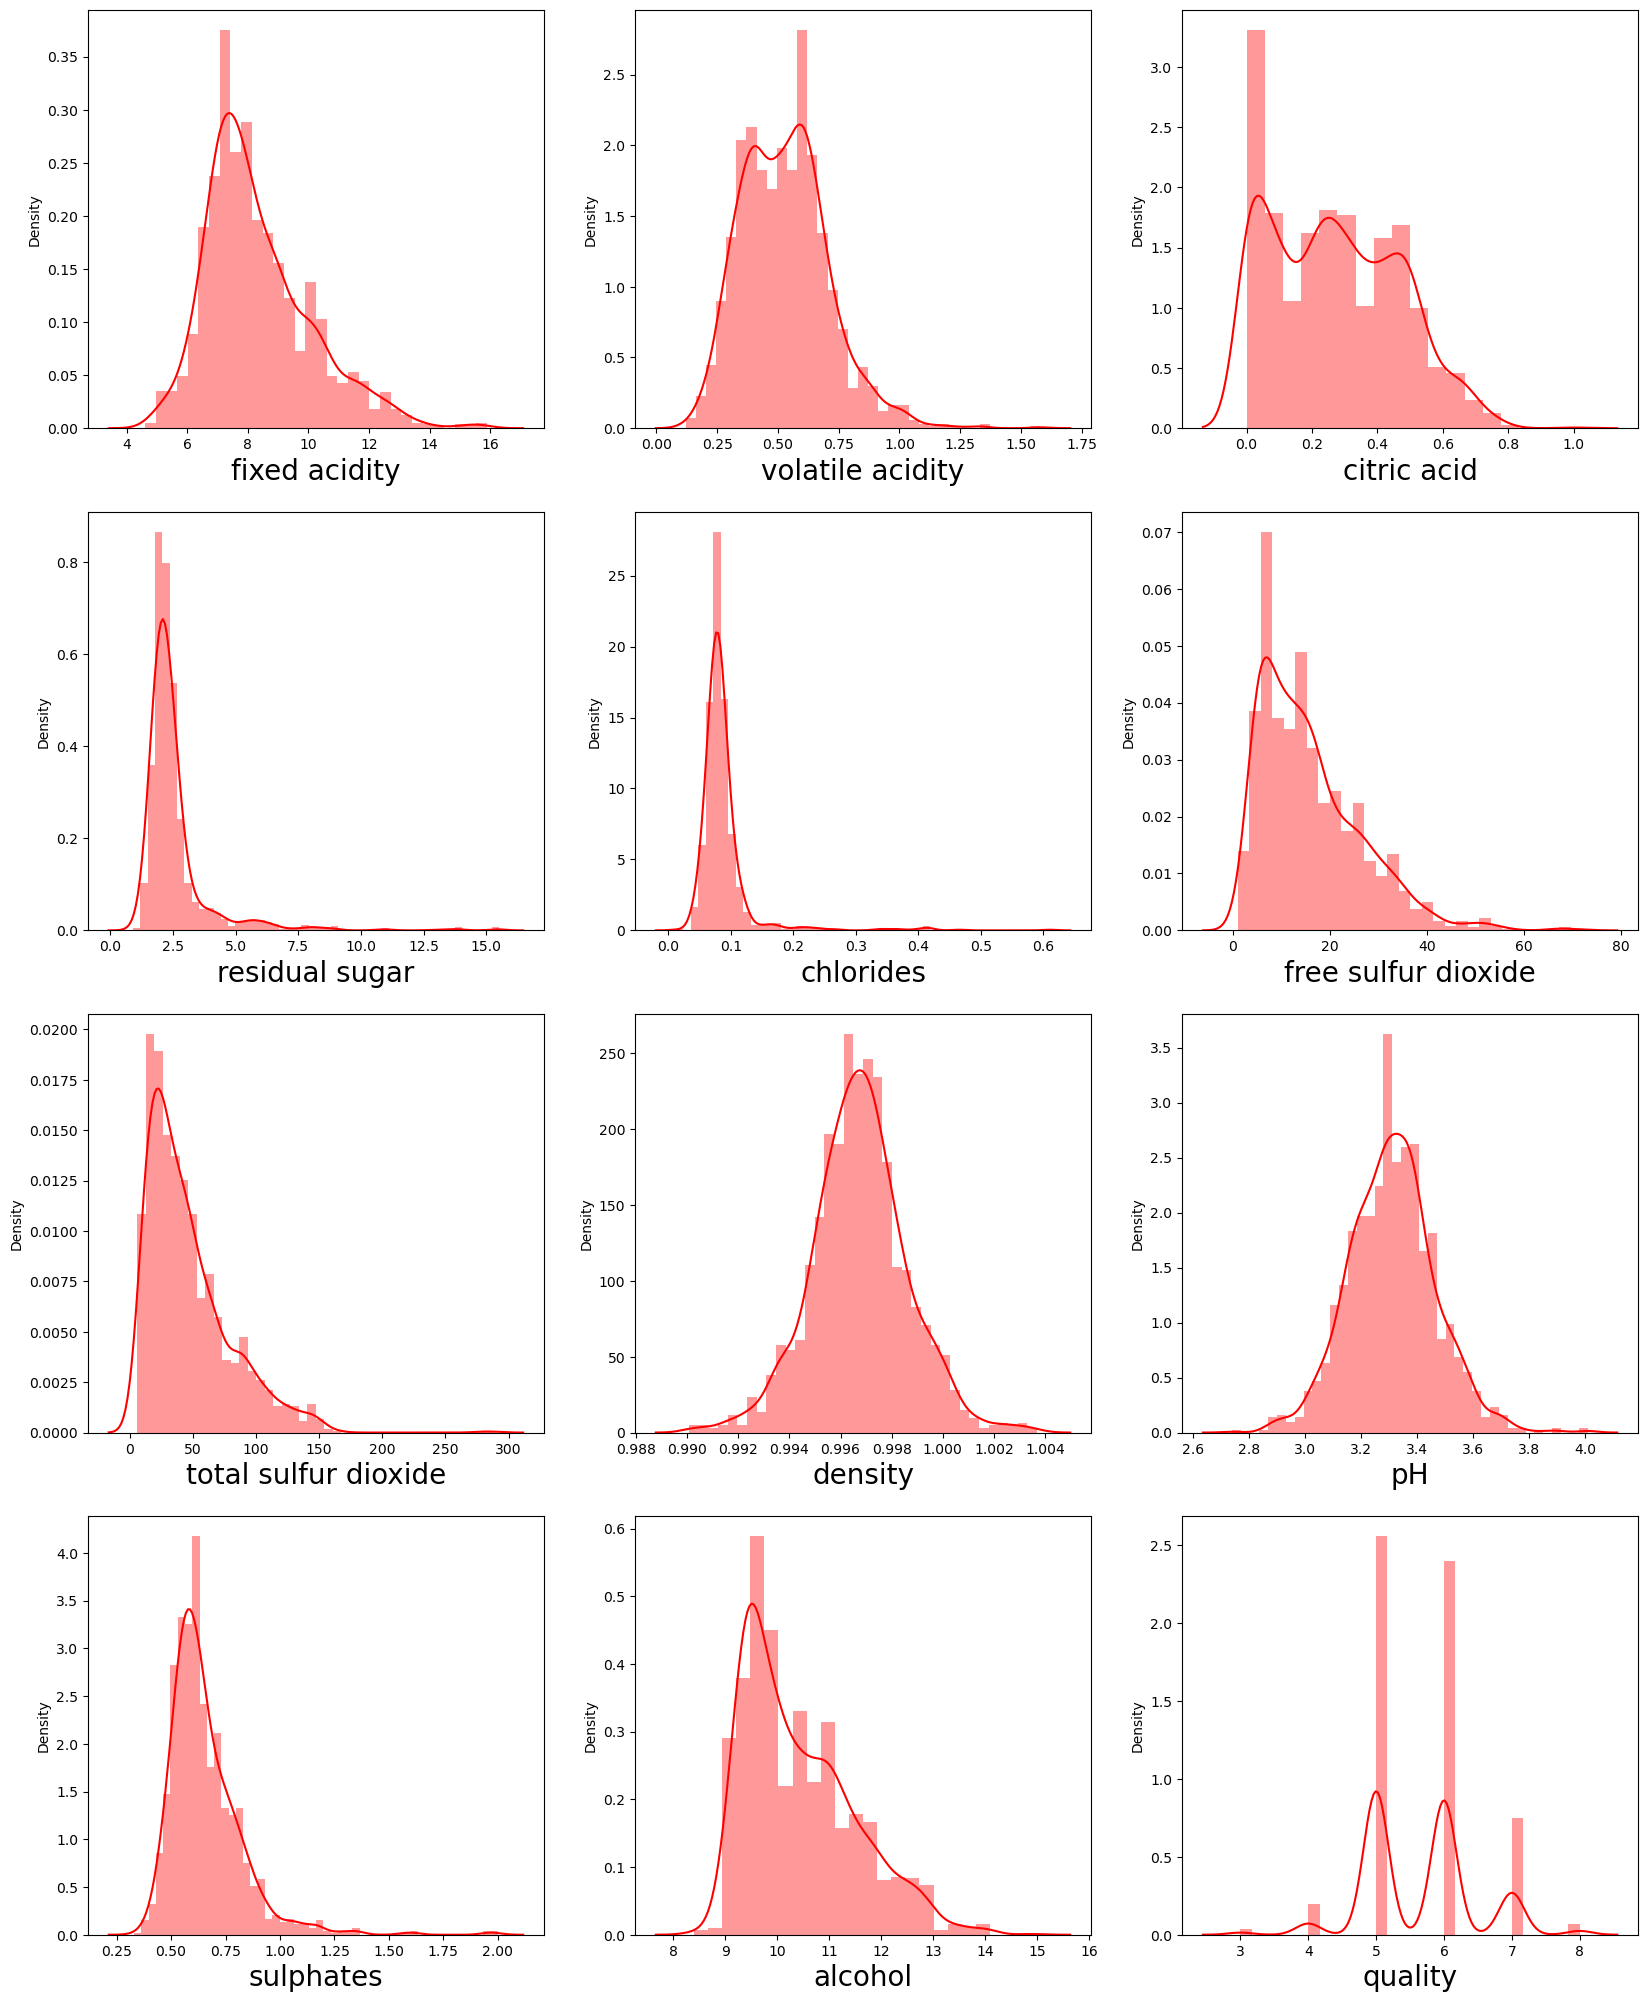

In [153]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber =1
for column in df:
    if plotnumber <=12:
        ax = plt.subplot(4,3,plotnumber)
        sns.distplot(df[column], color='r')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

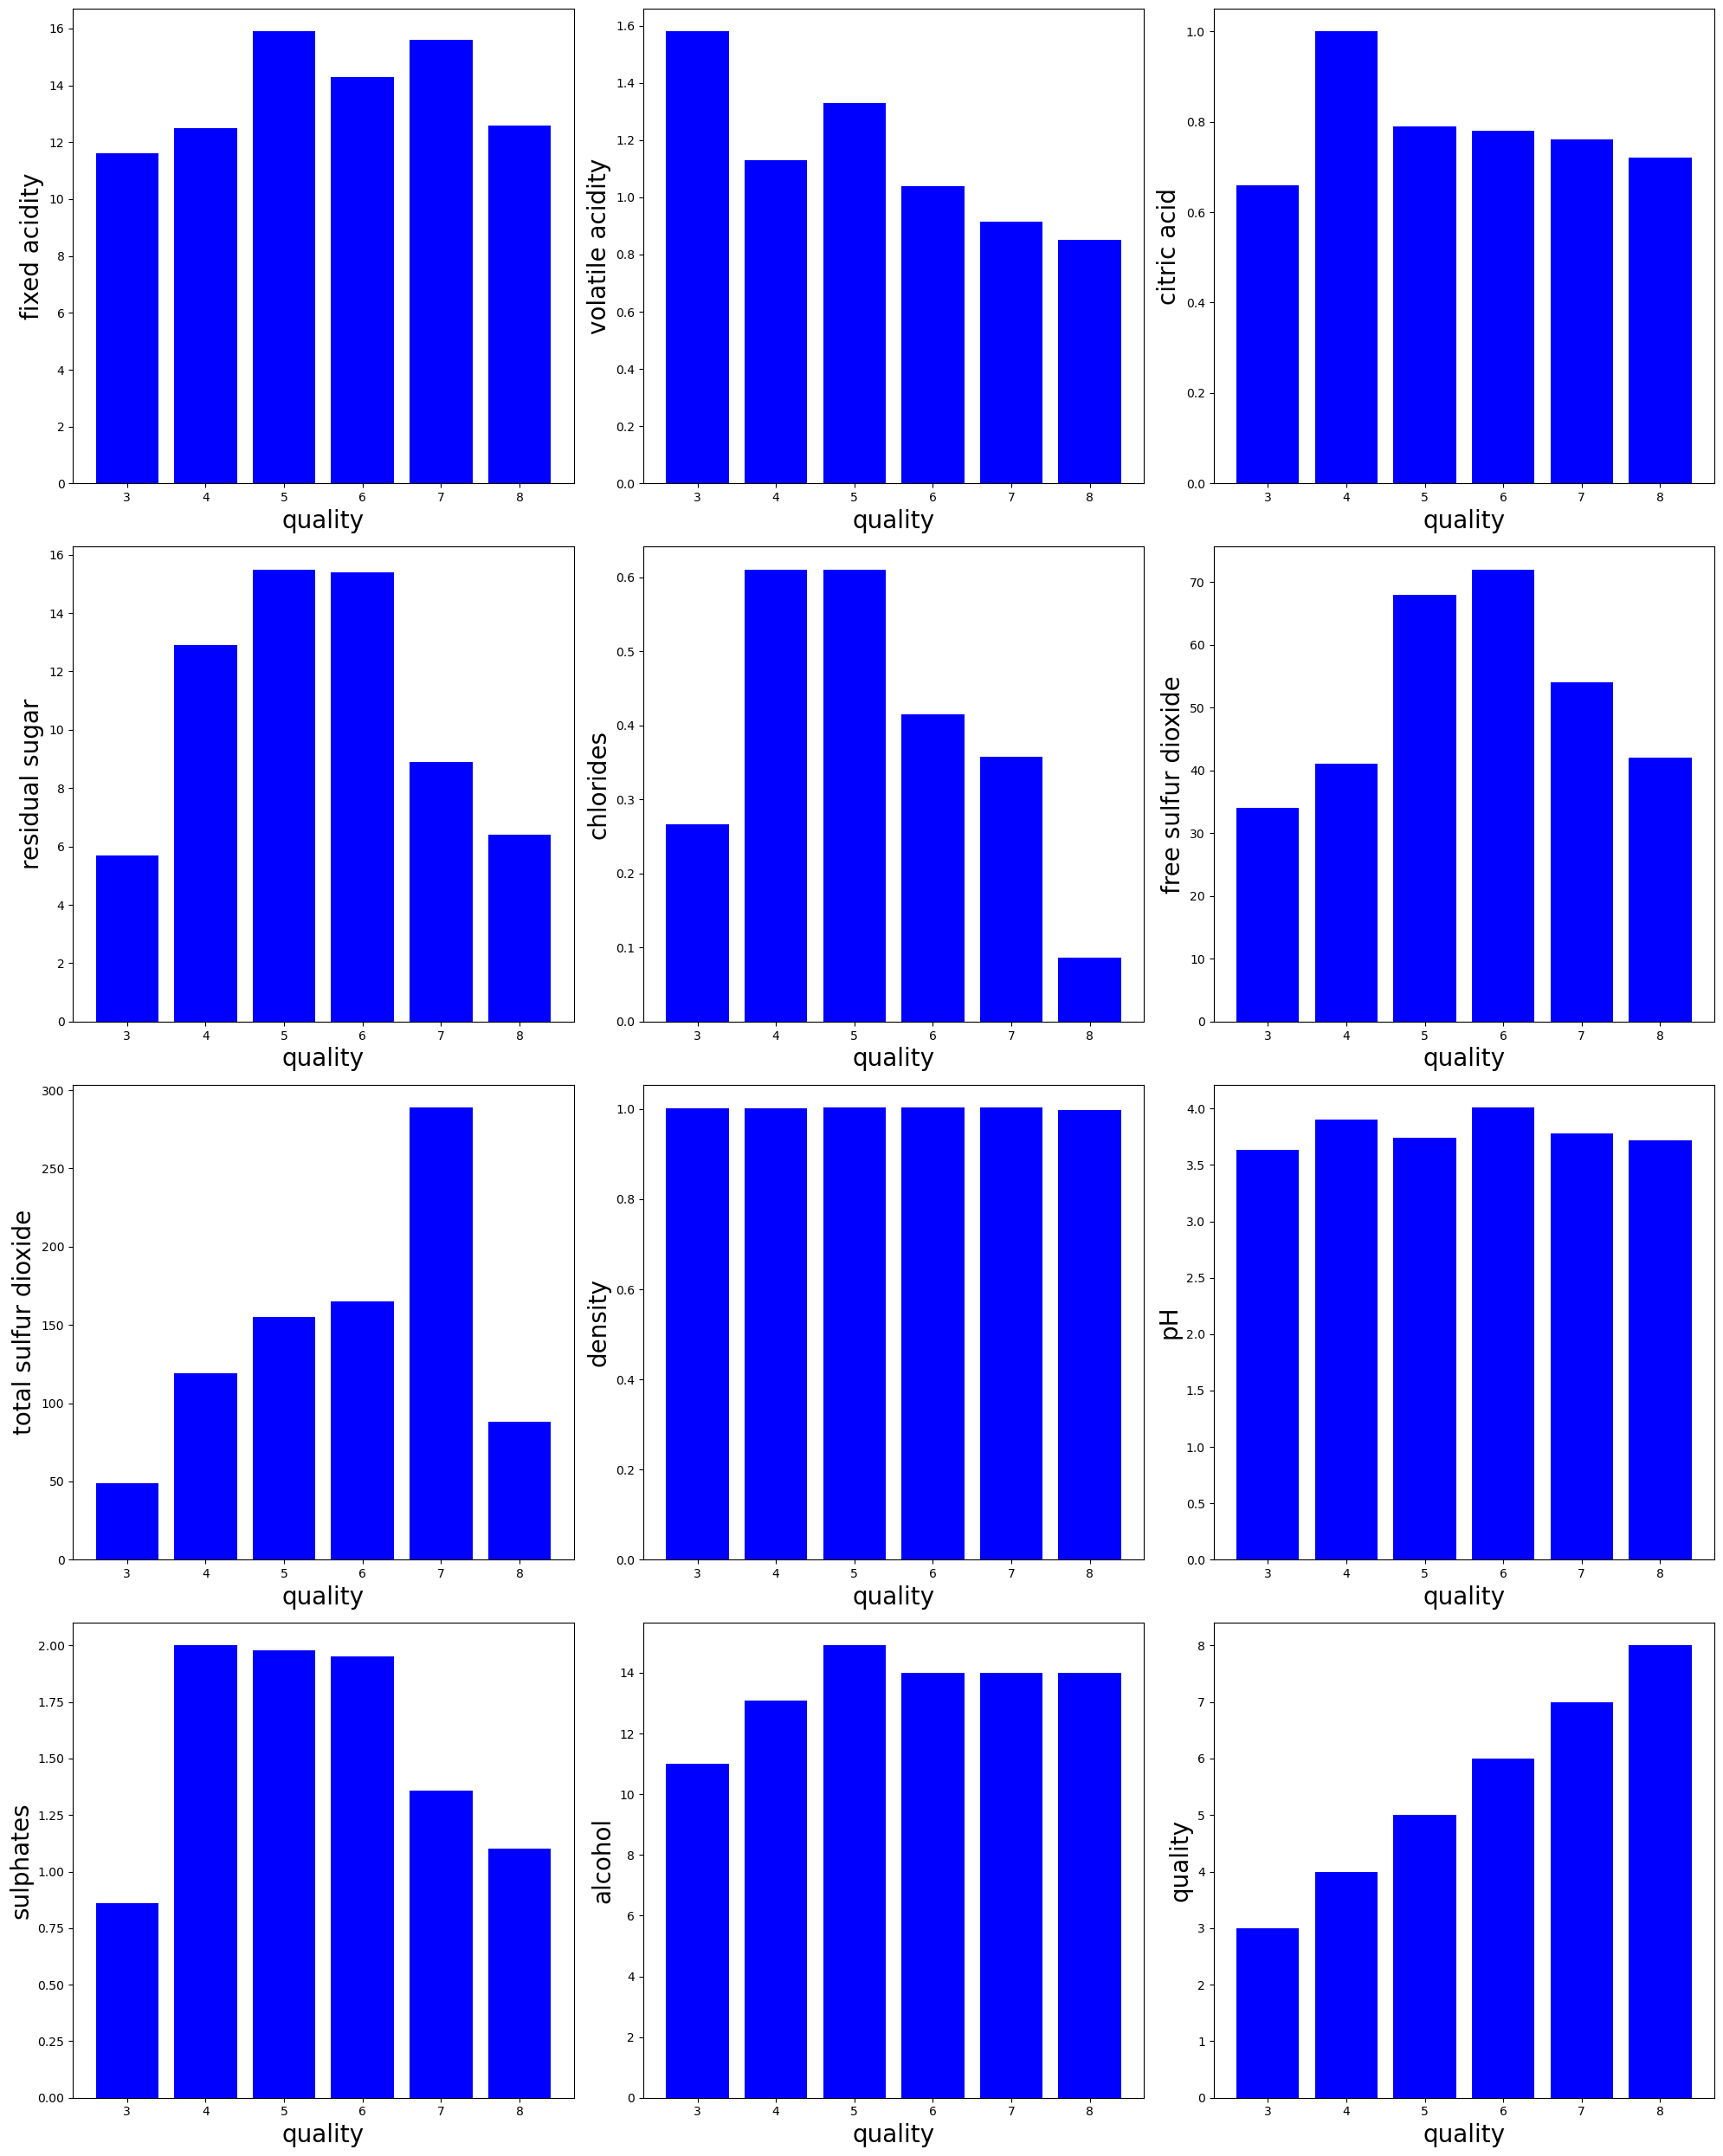

In [154]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber =1
for column in df:
    if plotnumber <=12:
        ax = plt.subplot(4,3,plotnumber)
        plt.bar(df['quality'], df[column], color='b') 
        plt.xlabel('quality',fontsize=20)
        plt.ylabel(column, fontsize =20)
    plotnumber+=1
plt.tight_layout()
plt.show()

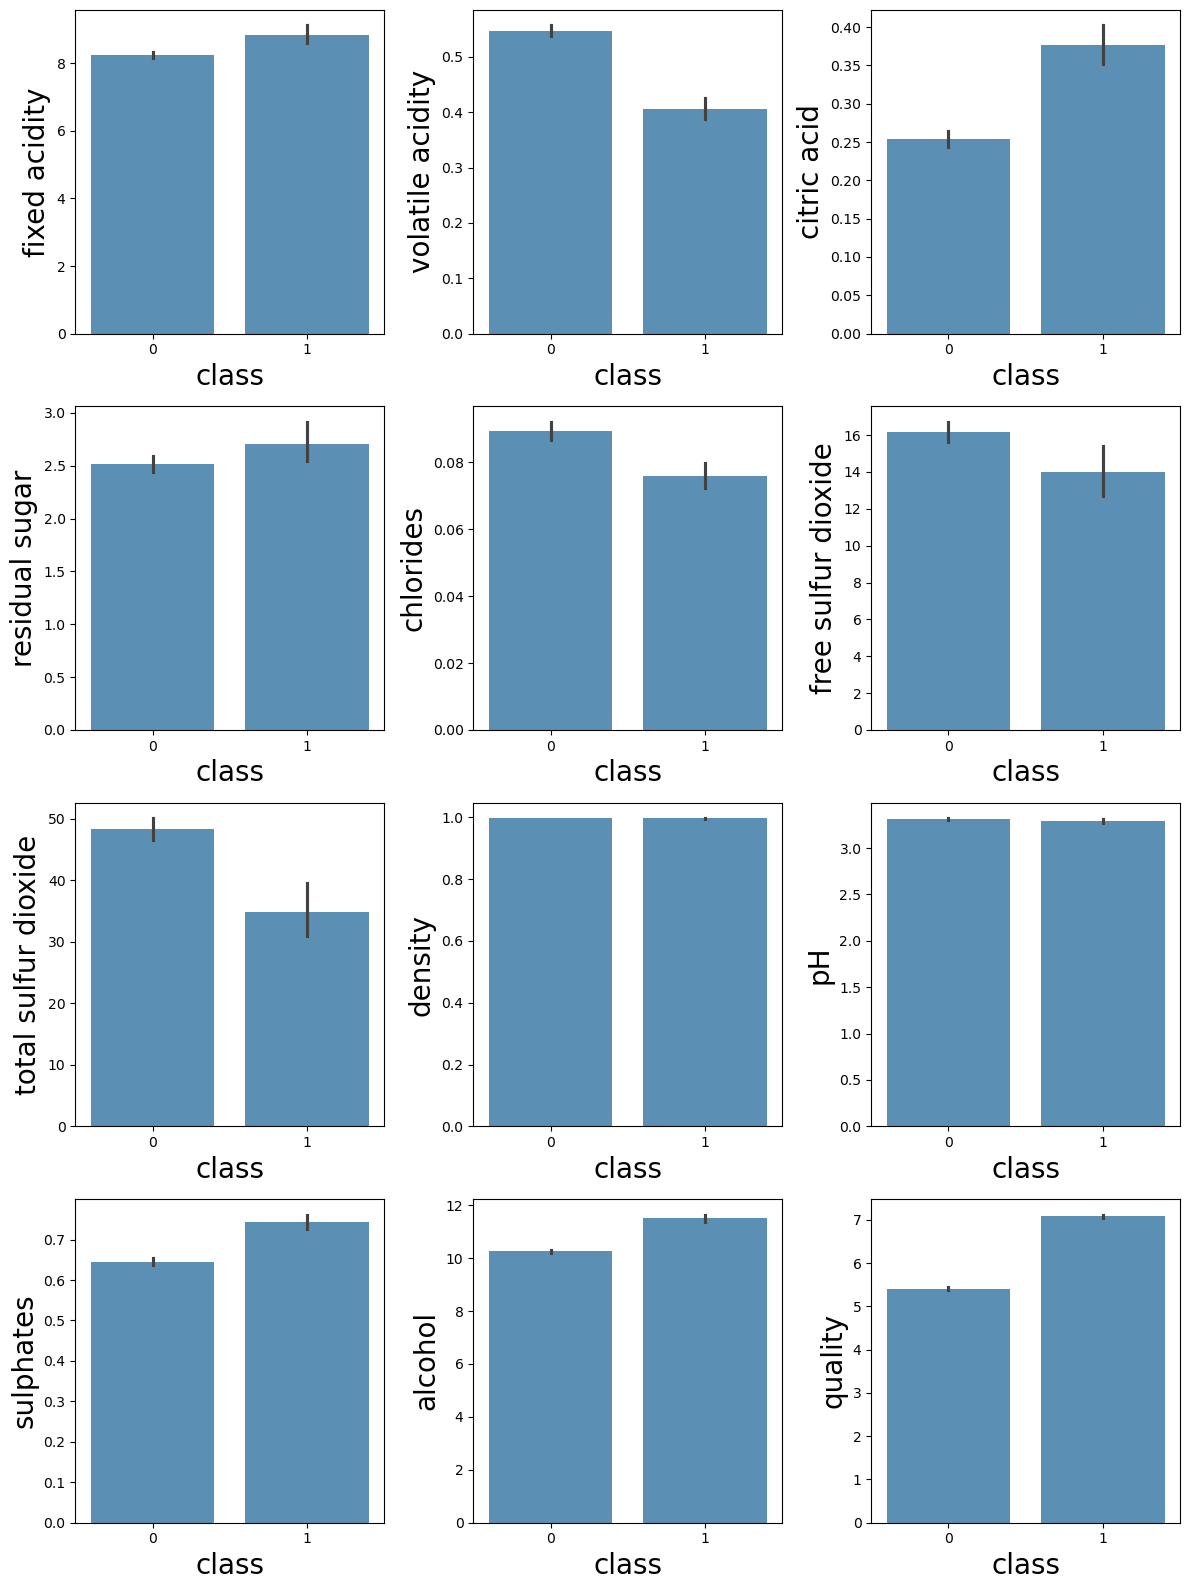

In [53]:
plt.figure(figsize=(12,16), facecolor='white')
plotnumber =1
for column in df:
    if plotnumber <=12:
        ax = plt.subplot(4,3,plotnumber)
        sns.barplot(x=df['class'], y=df[column], alpha=0.8)
        plt.xlabel('class',fontsize=20)
        plt.ylabel(column, fontsize =20)
    plotnumber+=1
plt.tight_layout()
plt.show()

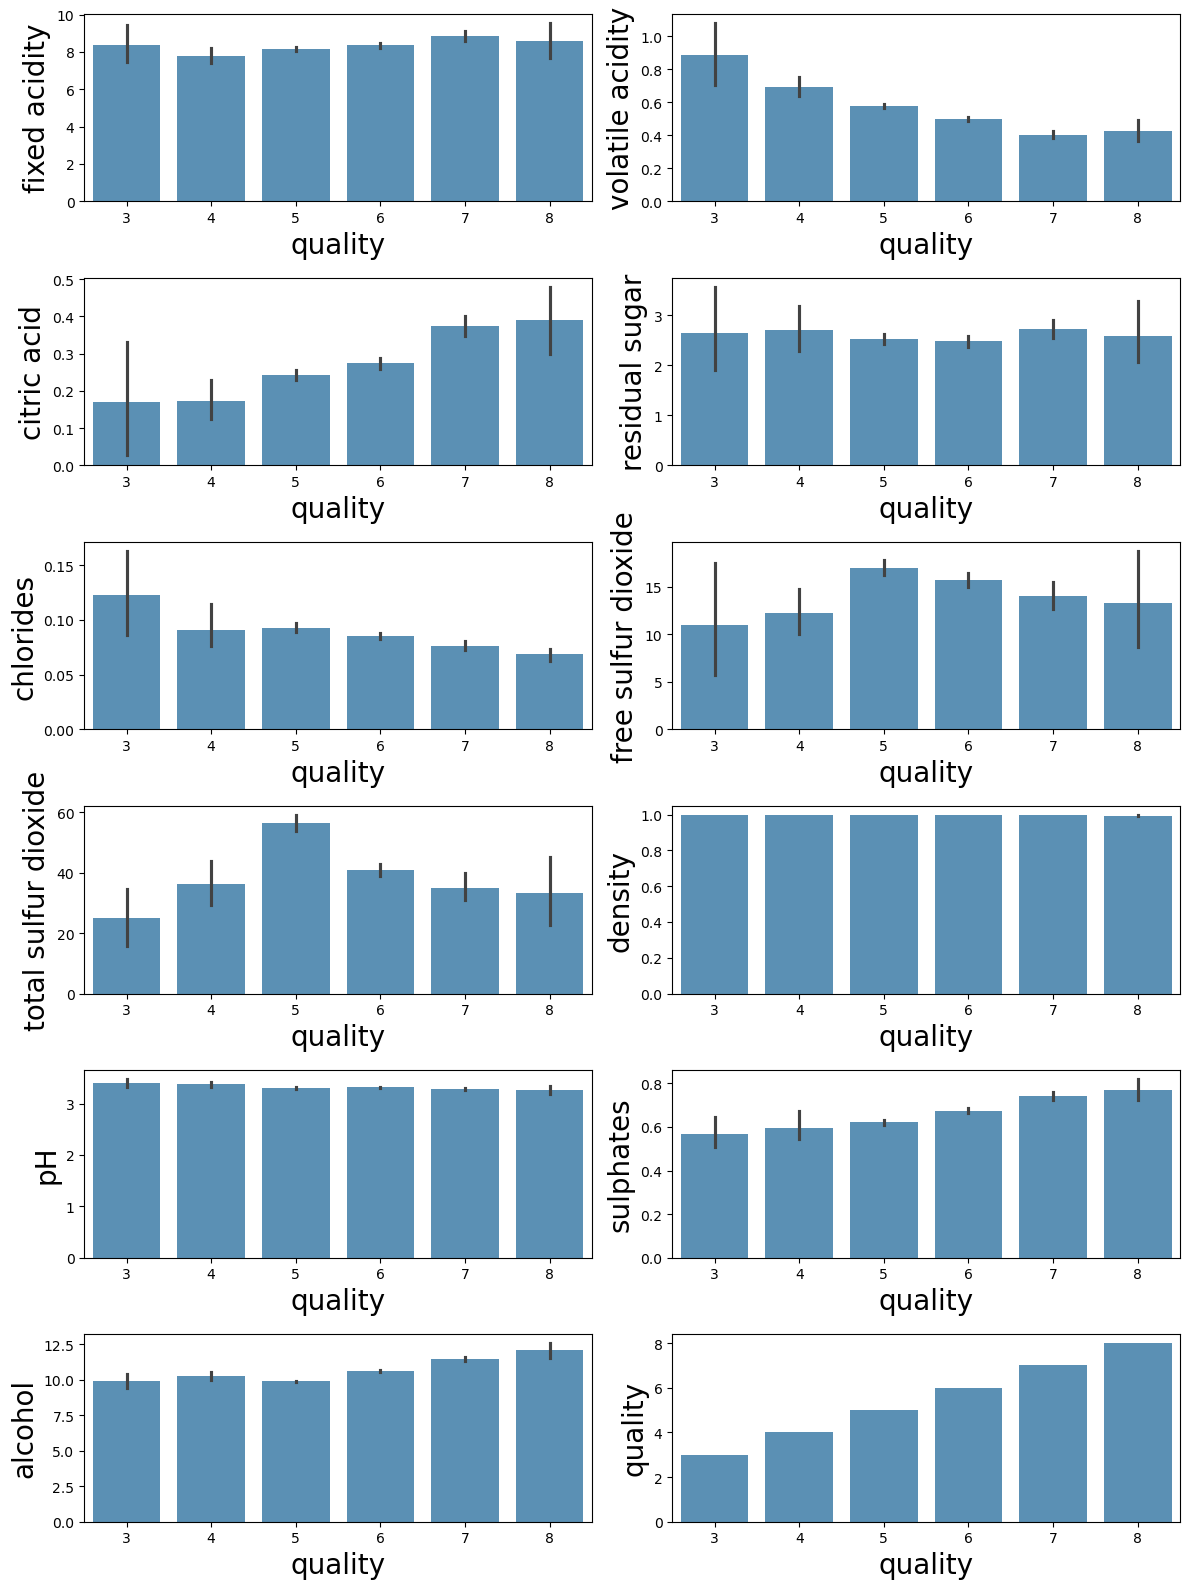

In [155]:
plt.figure(figsize=(12,16), facecolor='white')
plotnumber =1
for column in df:
    if plotnumber <=12:
        ax = plt.subplot(6,2,plotnumber)
        sns.barplot(x=df['quality'], y=df[column], alpha=0.8)
        plt.xlabel('quality',fontsize=20)
        plt.ylabel(column, fontsize =20)
    plotnumber+=1
plt.tight_layout()
plt.show()

In [157]:
Grp_c=df.groupby('class')
C_1=Grp_c.get_group(1)
C_2=Grp_c.get_group(0)

<Axes: >

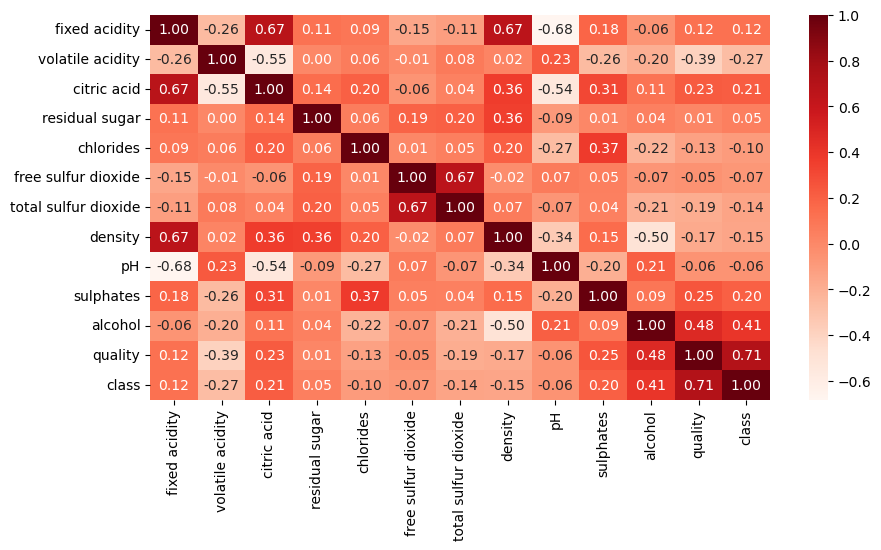

In [158]:
# correlation and headtmap
plt.figure(figsize = (10,5))
sns.heatmap(df.corr(), annot=True,cmap='Reds', fmt = '.2f')

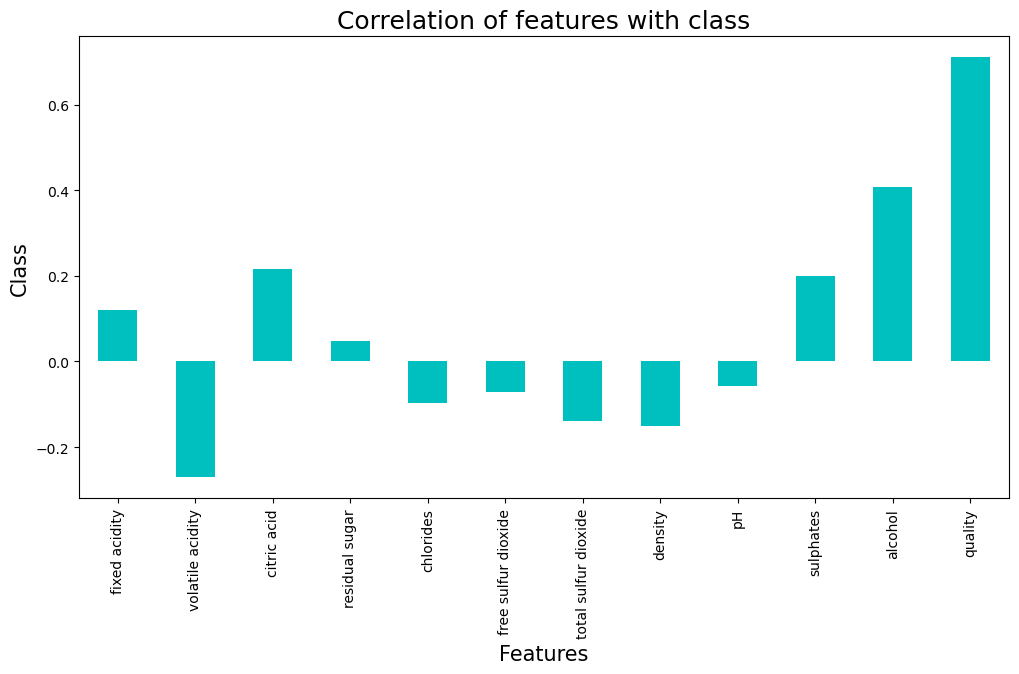

In [159]:
plt.figure(figsize = (12,6))
df.corr()['class'].drop(['class']).plot(kind='bar',color = 'c')
plt.xlabel('Features',fontsize=15)
plt.ylabel('Class',fontsize=15)
plt.title('Correlation of features with class',fontsize = 18)
plt.show()

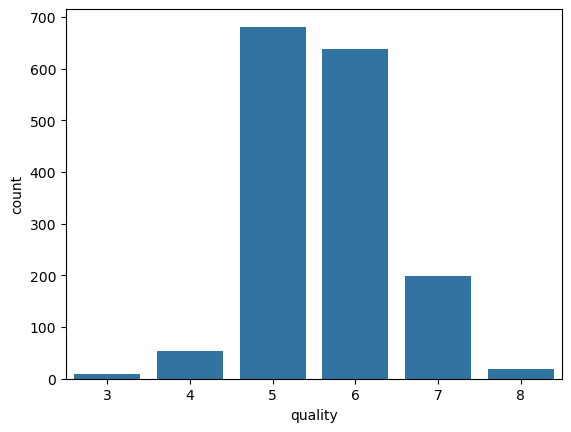

In [160]:
sns.countplot(df,x="quality")
plt.show()
##we observe we can easily  create 3 clasees , Low, Medium , High 

In [161]:
## binning quality to <=6,  >6 (as provided in the tips section of the kaggles datasets section )

bins = [0, 7, 10]

# Define bin labels (we keep the labels numeric as the model input has to be in numeric data types)
bin_labels = [ 0,1]

# Use cut() function to bin the data
df['quality']= pd.cut(df['quality'], bins=bins, labels=bin_labels, right=False)

In [162]:
df['quality'].value_counts(normalize = True)

quality
0    0.86429
1    0.13571
Name: proportion, dtype: float64

In [169]:
# Splitting the data

# Separate the input features (X) and the target variable (y)
x = df.drop(columns=['quality']) # X contains all columns except 'Attrition_Yes'
y = df['quality'] # y contains only the 'Attrition_Yes' column, which is the target variable

In [170]:
x.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'class'],
      dtype='object')

In [166]:
##feauture scaling , there are some outliers as seen in box plot and units of each variables are different 

from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()
x = sc.fit_transform(x)

In [171]:
# let us look at how much each factor is impacting towards quality using Feature importance. This step is also helpful whether to retain or drop variables for ML
from sklearn.ensemble import ExtraTreesClassifier
feature_imp= ExtraTreesClassifier()
feature_imp.fit(x,y)
scores = feature_imp.feature_importances_
pd.DataFrame({'Feature': x.columns,'Feature_Importance': (scores*100)}).sort_values(by = 'Feature_Importance', ascending = False)
# all selected variables contribute to quality.

,Feature,Feature_Importance
11,class,89.770249
10,alcohol,2.760821
1,volatile acidity,1.285981
2,citric acid,1.250715
9,sulphates,1.207536
6,total sulfur dioxide,0.894542
7,density,0.681189
0,fixed acidity,0.579075
3,residual sugar,0.455840
5,free sulfur dioxide,0.403230


In [172]:
# Splitting into testing and training sets

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=100)

# Checking the shapes:

print('X_train.shape',x_train.shape)
print('y_train.shape',y_train.shape)
print('X_test.shape',x_test.shape)
print('y_test.shape',y_test.shape)

X_train.shape (1279, 12)
y_train.shape (1279,)
X_test.shape (320, 12)
y_test.shape (320,)


In [173]:
model = LogisticRegression(random_state=100)

# Training the model
model.fit(x_train, y_train)

# Making the prediction
y_pred = model.predict(x_test)

#results
print(classification_report(y_test, y_pred))

# Cross Validation
cv = cross_val_score(model, x_train, y_train, cv=10) 
print('cross_val_score:', round(cv.mean(),2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       285
           1       1.00      1.00      1.00        35

    accuracy                           1.00       320
   macro avg       1.00      1.00      1.00       320
weighted avg       1.00      1.00      1.00       320

cross_val_score: 1.0


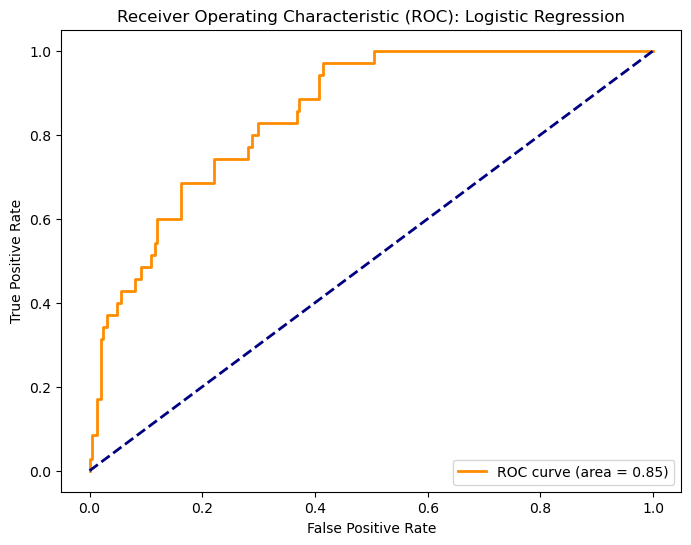

AUC Value: 0.85


In [142]:
## Evaluating the model with ROC and AUC

#Predict probabilities for the test set
y_prob = model.predict_proba(x_test)[:, 1]

#Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC): Logistic Regression')
plt.legend(loc="lower right")
plt.show()

print(f"AUC Value: {roc_auc:.2f}")

In [174]:
#Decision Tree

model = DecisionTreeClassifier(random_state=100) 
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))

cv = cross_val_score(model, x_train, y_train, cv=10) 
print('cross_val_score:', round(cv.mean(),2))

NameError: name 'DecisionTreeClassifier' is not defined

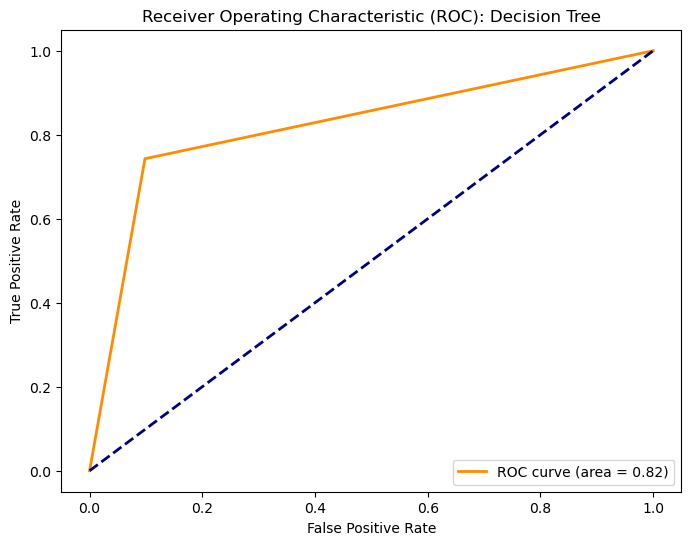

AUC Value: 0.82


In [145]:
## Evaluating the model with ROC and AUC

# Predict probabilities for the test set
y_prob = model.predict_proba(x_test)[:, 1]

#Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC): Decision Tree')
plt.legend(loc="lower right")
plt.show()

print(f"AUC Value: {roc_auc:.2f}")

In [175]:
#Random Forest

model = RandomForestClassifier(random_state = 100) 
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))

cv = cross_val_score(model, x_train, y_train, cv=10) 
print('cross_val_score:', round(cv.mean(),2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       285
           1       1.00      1.00      1.00        35

    accuracy                           1.00       320
   macro avg       1.00      1.00      1.00       320
weighted avg       1.00      1.00      1.00       320

cross_val_score: 1.0


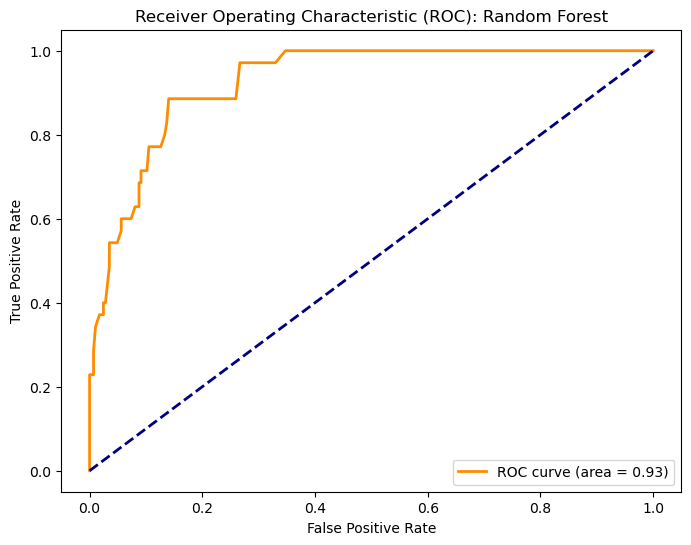

AUC Value: 0.93


In [147]:
## Evaluating the model with ROC and AUC

# Predict probabilities for the test set
y_prob = model.predict_proba(x_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC): Random Forest')
plt.legend(loc="lower right")
plt.show()

print(f"AUC Value: {roc_auc:.2f}")

In [176]:
#Random Forest

model = xgb.XGBClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))

cv = cross_val_score(model, x_train, y_train, cv=10) 
print('cross_val_score:', round(cv.mean(),2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       285
           1       1.00      1.00      1.00        35

    accuracy                           1.00       320
   macro avg       1.00      1.00      1.00       320
weighted avg       1.00      1.00      1.00       320

cross_val_score: 1.0


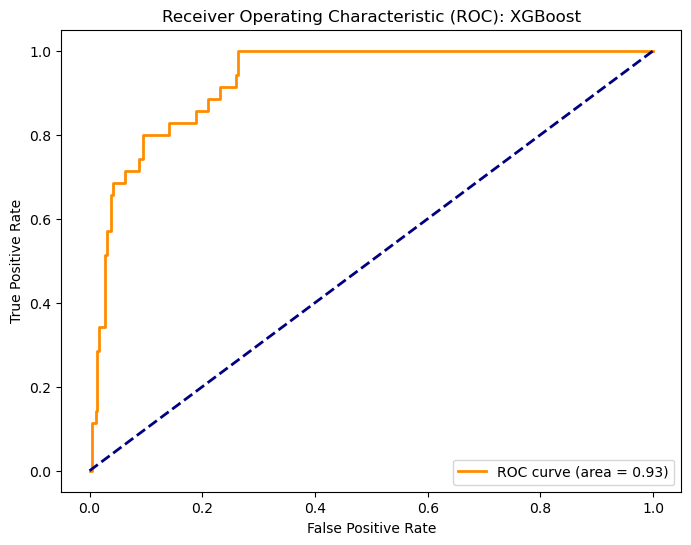

AUC Value: 0.93


In [162]:
## Evaluating the model with ROC and AUC

#Predict probabilities for the test set
y_prob = model.predict_proba(x_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC): XGBoost')
plt.legend(loc="lower right")
plt.show()

print(f"AUC Value: {roc_auc:.2f}")

In [178]:
#Hyper Parameter Tuning

In [183]:
from sklearn.model_selection import GridSearchCV

parameter = {'n_estimators':[30,50,60],'max_depth': [10,20,40,60,80],
             'criterion':['gini','entropy'],'max_features':["auto","sqrt","log2"]}

In [182]:
GCV = GridSearchCV(RandomForestClassifier(),parameter,cv=5,n_jobs = -1)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 40, 60, 80],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [30, 50, 60]})

In [184]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'sqrt',
 'n_estimators': 30}

In [185]:
#Random Forest

model = RandomForestClassifier(random_state = 100) 
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))

cv = cross_val_score(model, x_train, y_train, cv=10) 
print('cross_val_score:', round(cv.mean(),2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       285
           1       1.00      1.00      1.00        35

    accuracy                           1.00       320
   macro avg       1.00      1.00      1.00       320
weighted avg       1.00      1.00      1.00       320

cross_val_score: 1.0
